Description of columns:

*wave: speed dating round<br>
*gender: gender of self<br>
*age: age of self<br>
*age_o: age of partner<br>
*d_age: difference in age<br>
*race: race of self<br>
*race_o: race of partner<br>
*samerace: is the pair the same race?<br>
*importance_same_race: how important is it that your partner is the same race?<br>
*importance_same_religion: how important is it that your partner is the same religion?<br>
*field: field of study<br>
*pref_o_attractive: how important does your partner rate being attractive?<br>
*pref_o_sincere: how important does your partner rate being sincere?<br>
*pref_o_intellgence: how important does your partner rate being intelligent?<br>
*pref_o_funny: how important does your partner rate being funny?<br>
*pref_o_ambitious: how important does your partner rate being ambitious?<br>
*pref_o_shared_interets: how important does your partner rate having shared interests?<br>
*attrative_o: rating by partner (about self)-how attractive is your partner?<br>
*sincere_o: rating by partner (about self)-how sincere is your partner?<br>
*intelligence_o: rating by partner (about self)-how intelligent is your partner?<br>
*funny_o: rating by partner (about self)-how funny is your partner?<br>
*ambitious_o: rating by partner (about self)-how ambitious is your partner?<br>
*shared_interests_o: rating by partner (about self)-do you have shared interests?<br>
*attractive_important: how important is it that your partner is attractive?<br>
*sincere_important: how important is it that your partner is sincere?<br>
*intelligence_important: how important is it that your partner is intelligent?<br>
*funny_important: how important is it that your partner is funny?<br>
*ambition_important: how important is it that your partner is ambitious?<br>
*shared_interests_important: how important is it that you have shared interests with your partner?<br>
*attractive: rate yourself-how attractive are you?<br>
*sincere: rate yourself-how sincere are you?<br>
*intelligence: rate yourself-how intelligent are you?<br>
*funny: rate yourself-how funny are you?<br>
*ambition: rate yourself-how ambitious are you?<br>
*attractive_partner: rate your partner-how attractive is your partner?<br>
*sincere_partner: rate your partner-how sincere is your partner?<br>
*intelligence_partner: rate your partner-how intelligent is your partner?<br>
*funny_partner: rate your partner-how funny is your partner?<br>
*ambition_partner: rate your partner-how ambitious is your partner?<br>
*shared_interests_partner: rate your partner-do you have shared interests with your partner?<br>
*sports: scale 1-10-how interested in sports are you?<br>
*tvsports: scale 1-10-how interested in tv sports are you?<br>
*exercise: scale 1-10-how interested in exercise are you?<br>
*dining: scale 1-10-how interested in dining are you?<br>
*museums: scale 1-10-how interested in museums are you?<br>
*art: scale 1-10-how interested in art are you?<br>
*hiking: scale 1-10-how interested in hiking are you?<br>
*gaming: scale 1-10-how interested in gaming are you?<br>
*clubbing: scale 1-10-how interested in clubbing are you?<br>
*reading: scale 1-10-how interested in reading are you?<br>
*tv: scale 1-10-how interested in tv are you?<br>
*theater: scale 1-10-how interested in theater are you?<br>
*movies: scale 1-10-how interested in movies are you?<br>
*concerts: scale 1-10-how interested in concerts are you?<br>
*music: scale 1-10-how interested in music are you?<br>
*shopping:scale 1-10-how interested in shopping are you?<br>
*yoga: scale 1-10-how interested in yoga are you?<br>
*interets_correlate: correlation between yours and your partners interests<br>
*expected_happy_with_sd_people: how happy does you think you will be with the people you meet during this event?<br>
*expected_num_interested_in_me: how many people will be interested in you during this event?<br>
*expected_num_matches: how many matches do you think you will get?<br>
*like: did you like your partner?<br>
*guess_prob_liked: do you think your partner likes you?<br>
*met: have you met your partner before?<br>
*decision: what is your decision at the end of the night about your partner?<br>
*decision_o: what was your partners decision at the end of the night?<br>
*match: was is a match?!

In [1]:
#load packages needed for preprocessing, load in data, check out the data CHANGE PLT DISPLAY
import numpy as np
import pandas as pd
pd.set_option("display.max_rows", None, "display.max_columns", None)
from scipy.io.arff import loadarff

from IPython.display import display

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix



raw_data = loadarff(r'/Users/cecylia/Desktop/Notes/speeddating.arff')
df = pd.DataFrame(raw_data[0])
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 123 columns):
 #    Column                           Non-Null Count  Dtype  
---   ------                           --------------  -----  
 0    has_null                         8378 non-null   object 
 1    wave                             8378 non-null   float64
 2    gender                           8378 non-null   object 
 3    age                              8283 non-null   float64
 4    age_o                            8274 non-null   float64
 5    d_age                            8378 non-null   float64
 6    d_d_age                          8378 non-null   object 
 7    race                             8378 non-null   object 
 8    race_o                           8378 non-null   object 
 9    samerace                         8378 non-null   object 
 10   importance_same_race             8299 non-null   float64
 11   importance_same_religion         8299 non-null   float64
 12   d_im

It looks like there are a lot of colummns, a lot of missing data, and a lot of objects which will need to eventually be dealt with. Let's check out our data more closely and see what is included in the dataset.

In [2]:
#check out data
df.head()

,has_null,wave,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,importance_same_race,importance_same_religion,d_importance_same_race,d_importance_same_religion,field,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,d_pref_o_attractive,d_pref_o_sincere,d_pref_o_intelligence,d_pref_o_funny,d_pref_o_ambitious,d_pref_o_shared_interests,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,d_attractive_o,d_sinsere_o,d_intelligence_o,d_funny_o,d_ambitous_o,d_shared_interests_o,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,d_attractive_important,d_sincere_important,d_intellicence_important,d_funny_important,d_ambtition_important,d_shared_interests_important,attractive,sincere,intelligence,funny,ambition,d_attractive,d_sincere,d_intelligence,d_funny,d_ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,d_attractive_partner,d_sincere_partner,d_intelligence_partner,d_funny_partner,d_ambition_partner,d_shared_interests_partner,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,d_sports,d_tvsports,d_exercise,d_dining,d_museums,d_art,d_hiking,d_gaming,d_clubbing,d_reading,d_tv,d_theater,d_movies,d_concerts,d_music,d_shopping,d_yoga,interests_correlate,d_interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,expected_num_matches,d_expected_happy_with_sd_people,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match
0,b'0',1.0,b'female',21.0,27.0,6.0,b'[4-6]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',2.0,4.0,b'[2-5]',b'[2-5]',b'Law',35.0,20.0,20.0,20.0,0.0,5.0,b'[21-100]',b'[16-20]',b'[16-20]',b'[16-20]',b'[0-15]',b'[0-15]',6.0,8.0,8.0,8.0,8.0,6.0,b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',15.0,20.0,20.0,15.0,15.0,15.0,b'[0-15]',b'[16-20]',b'[16-20]',b'[0-15]',b'[0-15]',b'[0-15]',6.0,8.0,8.0,8.0,7.0,b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',6.0,9.0,7.0,7.0,6.0,5.0,b'[6-8]',b'[9-10]',b'[6-8]',b'[6-8]',b'[6-8]',b'[0-5]',9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,b'[9-10]',b'[0-5]',b'[6-8]',b'[9-10]',b'[0-5]',b'[0-5]',b'[0-5]',b'[0-5]',b'[0-5]',b'[6-8]',b'[9-10]',b'[0-5]',b'[9-10]',b'[9-10]',b'[9-10]',b'[6-8]',b'[0-5]',0.14,b'[0-0.33]',3.0,2.0,4.0,b'[0-4]',b'[0-3]',b'[3-5]',7.0,6.0,b'[6-8]',b'[5-6]',0.0,b'1',b'0',b'0'
1,b'0',1.0,b'female',21.0,22.0,1.0,b'[0-1]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',2.0,4.0,b'[2-5]',b'[2-5]',b'Law',60.0,0.0,0.0,40.0,0.0,0.0,b'[21-100]',b'[0-15]',b'[0-15]',b'[21-100]',b'[0-15]',b'[0-15]',7.0,8.0,10.0,7.0,7.0,5.0,b'[6-8]',b'[6-8]',b'[9-10]',b'[6-8]',b'[6-8]',b'[0-5]',15.0,20.0,20.0,15.0,15.0,15.0,b'[0-15]',b'[16-20]',b'[16-20]',b'[0-15]',b'[0-15]',b'[0-15]',6.0,8.0,8.0,8.0,7.0,b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',7.0,8.0,7.0,8.0,5.0,6.0,b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',b'[0-5]',b'[6-8]',9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,b'[9-10]',b'[0-5]',b'[6-8]',b'[9-10]',b'[0-5]',b'[0-5]',b'[0-5]',b'[0-5]',b'[0-5]',b'[6-8]',b'[9-10]',b'[0-5]',b'[9-10]',b'[9-10]',b'[9-10]',b'[6-8]',b'[0-5]',0.54,b'[0.33-1]',3.0,2.0,4.0,b'[0-4]',b'[0-3]',b'[3-5]',7.0,5.0,b'[6-8]',b'[5-6]',1.0,b'1',b'0',b'0'
2,b'1',1.0,b'female',21.0,22.0,1.0,b'[0-1]',b'Asian/Pacific Islander/Asian-American',b'Asian/Pacific Islander/Asian-American',b'1',2.0,4.0,b'[2-5]',b'[2-5]',b'Law',19.0,18.0,19.0,18.0,14.0,12.0,b'[16-20]',b'[16-20]',b'[16-20]',b'[16-20]',b'[0-15]',b'[0-15]',10.0,10.0,10.0,10.0,10.0,10.0,b'[9-10]',b'[9-10]',b'[9-10]',b'[9-10]',b'[9-10]',b'[9-10]',15.0,20.0,20.0,15.0,15.0,15.0,b'[0-15]',b'[16-20]',b'[16-20]',b'[0-15]',b'[0-15]',b'[0-15]',6.0,8.0,8.0,8.0,7.0,b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8

There are many columns here that are unessasary. Most columns have an associated column that puts the column into a category. For example, if someone is 26 they land in the 25-30 interval category range. While these columns may be useful for other projects this is not very useful in creating our model. . We will drop some of these columns. I also see a potential problem with the descision columns. This is cheating and will create a model accuracy of 100%. We will drop these are well.

In [3]:
#dropping some columns that are not needed as well as col that mess with the models accuracy
cols_drop=['d_d_age','d_importance_same_race','d_importance_same_religion', 'd_pref_o_attractive', 'd_pref_o_sincere',
'd_pref_o_intelligence', 'd_pref_o_funny', 'd_pref_o_ambitious', 'd_pref_o_shared_interests', 'd_attractive_o', 
'd_sinsere_o','d_intelligence_o', 'd_funny_o', 'd_ambitous_o', 'd_shared_interests_o', 'd_attractive_important', 
'd_sincere_important', 'd_intellicence_important', 'd_funny_important','d_ambtition_important', 
'd_shared_interests_important', 'd_attractive', 'd_sincere', 'd_intelligence', 'd_funny', 'd_ambition',
'd_attractive_partner', 'd_sincere_partner','d_intelligence_partner', 'd_funny_partner', 'd_ambition_partner', 
'd_shared_interests_partner','d_sports', 'd_tvsports', 'd_exercise', 'd_dining','d_museums', 'd_art', 'd_hiking', 
'd_gaming', 'd_clubbing', 'd_reading', 'd_tv', 'd_theater', 'd_movies', 'd_concerts','d_music', 'd_shopping', 
'd_yoga', 'd_interests_correlate', 'd_expected_happy_with_sd_people', 'd_expected_num_interested_in_me', 
'd_expected_num_matches', 'd_like', 'd_guess_prob_liked', 'decision', 'decision_o']
print(len(cols_drop))
df.drop(cols_drop, axis=1, inplace=True)

57


Cleaning up the data a little more and dealing with missing values will make preprocessing a little easier. I also intend to create a dashboard for this project so I would like the data to be as clean as possible. One thing I noticed is there are some ? in the data. Lets replace them with Nan. We will have to impute or drop this missing data before starting any modeling.

In [4]:
#dealing with bytes
bytes_cols = df.applymap(lambda col: isinstance(col, bytes)).all(0)
bytes_cols = df.columns[bytes_cols]
bytes_cols
df.loc[:, bytes_cols] = df[bytes_cols].applymap(lambda col: col.decode("utf-8", errors="ignore"))
df.head()

,has_null,wave,gender,age,age_o,d_age,race,race_o,samerace,importance_same_race,importance_same_religion,field,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,attractive,sincere,intelligence,funny,ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,expected_num_matches,like,guess_prob_liked,met,match
0,0,1.0,female,21.0,27.0,6.0,Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,2.0,4.0,Law,35.0,20.0,20.0,20.0,0.0,5.0,6.0,8.0,8.0,8.0,8.0,6.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,6.0,9.0,7.0,7.0,6.0,5.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,0.14,3.0,2.0,4.0,7.0,6.0,0.0,0
1,0,1.0,female,21.0,22.0,1.0,Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,2.0,4.0,Law,60.0,0.0,0.0,40.0,0.0,0.0,7.0,8.0,10.0,7.0,7.0,5.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,7.0,8.0,7.0,8.0,5.0,6.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,0.54,3.0,2.0,4.0,7.0,5.0,1.0,0
2,1,1.0,female,21.0,22.0,1.0,Asian/Pacific Islander/Asian-American,Asian/Pacific Islander/Asian-American,1,2.0,4.0,Law,19.0,18.0,19.0,18.0,14.0,12.0,10.0,10.0,10.0,10.0,10.0,10.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,5.0,8.0,9.0,8.0,5.0,7.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,0.16,3.0,2.0,4.0,7.0,NaN,1.0,1
3,0,1.0,female,21.0,23.0,2.0,Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,2.0,4.0,Law,30.0,5.0,15.0,40.0,5.0,5.0,7.0,8.0,9.0,8.0,9.0,8.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,7.0,6.0,8.0,7.0,6.0,8.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,0.61,3.0,2.0,4.0,7.0,6.0,0.0,1
4,0,1.0,female,21.0,24.0,3.0,Asian/Pacific Islander/Asian-American,Latino/Hispanic American,0,2.0,4.0,Law,30.0,10.0,20.0,10.0,10.0,20.0,8.0,7.0,9.0,6.0,9.0,7.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,5.0,6.0,7.0,7.0,6.0,6.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,0.21,3.0,2.0,4.0,6.0,6.0,0.0,1


In [5]:
#Changing all NaN to be the same
df=df.replace('?', np.nan)

In [6]:
#lets check out what has missing values
df.isna().sum().sort_values(ascending=False)

expected_num_interested_in_me    6578
expected_num_matches             1173
shared_interests_o               1076
shared_interests_partner         1067
ambitous_o                        722
ambition_partner                  712
met                               375
funny_o                           360
funny_partner                     350
guess_prob_liked                  309
intelligence_o                    306
intelligence_partner              296
sinsere_o                         287
sincere_partner                   277
like                              240
attractive_o                      212
attractive_partner                202
interests_correlate               158
pref_o_shared_interests           129
shared_interests_important        121
pref_o_ambitious                  107
funny                             105
sincere                           105
intelligence                      105
ambition                          105
attractive                        105
age_o       

We will split our data into categorical and numerical. Most data is numerical but there are also a few columns that are categorical.

In [7]:
#splitting into cols that are categorical and numerical
cols=list(df.columns)
cat = ['gender', 'race', 'race_o', 'field']
num=[n for n in cols if n not in cat and n[::-1] not in cat]

In [8]:
#lets see each category and how many unique values each has
df[cat].nunique()

gender      2
race        5
race_o      5
field     259
dtype: int64

In [9]:
#lets see how many missing in each category
df[cat].isnull().sum()

gender     0
race      63
race_o    73
field     63
dtype: int64

There are 259 fields which is a lot. While this was to be expected lets see if there are some duplicates due to spelling, puncuation, or similar wording.

In [10]:
#lots of careers in field. Lets check this out
fields = df['field'].unique()
for v in fields:
    print(v)

Law
law
Economics
Masters in Public Administration
Masters of Social Work&Education
Finance
Business
political science
money
Operations Research
TC [Health Ed]
Psychology
social work
Social Work
Speech Language Pathology
Speech Languahe Pathology
Educational Psychology
Applied Maths/Econs
Mathematics
Statistics
Organizational Psychology
Mechanical Engineering
Finanace
Finance&Economics
Undergrad - GS
Mathematical Finance
Medicine
MBA
LAW
nan
psychology
German Literature
Business & International Affairs
MFA Creative Writing
Engineering
Electrical Engineering
Classics
Operations Research [SEAS]
chemistry
Journalism
Elementary/Childhood Education [MA]
microbiology
Masters of Social Work
Communications
Marketing
Chemistry
International Educational Development
Education Administration
Business [MBA]
Computer Science
Climate-Earth and Environ. Science
financial math
Business- MBA
Religion
Film
Sociology
Economics; English
Economics; Sociology
Polish
English
psychology and english
Biomedical 

Just as I suspected there are a lot of entries with uppercase letters, as well as entries that have [] instead of () which created a ton of duplicates. Let change some of these duplicates. We will also change all NaN to Unknown at this point.

In [11]:
#cleaning up field col a bit-make all lowercase, fix some puncatuation to minimize duplicates, fill in na with unknown 
df['field'] = df['field'].str.lower() 
df['field'] = df['field'].str.replace(" ", "_", regex=False)
df['field'] = df['field'].str.replace("[", "(", regex=False)
df['field'] = df['field'].str.replace("]", ")", regex=False)
df['field'] = df['field'].fillna('Unknown')
df['field'] = df['field'].astype(str)

In [12]:
#lets see how many careers we have now
fields = df['field'].unique()
fields.sort()
for v in fields:
    print(v)

Unknown
acting
african-american_studies/history
american_studies
american_studies_(masters)
anthropology
anthropology/education
applied_maths/econs
applied_physiology_&_nutrition
architecture
art_education
art_history
art_history/medicine
arts_administration
bilingual_education
biochemistry
biochemistry/genetics
biochemistry_&_molecular_biophysics
biology
biology_phd
biomedical_engineering
biomedical_informatics
biomedicine
biotechnology
business
business-_mba
business/_finance/_real_estate
business/law
business;_marketing
business;_media
business_&_international_affairs
business_(finance_&_marketing)
business_(mba)
business_administration
business_and_international_affairs_(mba/mia_dual_degree)
business_consulting
business_school
cell_biology
chemistry
classics
climate-earth_and_environ._science
climate_change
climate_dynamics
clinical_psychology
cognitive_studies_in_education
communications
communications_in_education
comparative_literature
computational_biochemsistry
computer_scienc

There are still a ton of duplicates so lets deal with the rest of the duplicates.

In [13]:
#lets replace some obvious duplicates
dict_replace={'business-mba': 'business_(mba)','business-_mba':'business_(mba)', 'electrical_engg.':'electrical_engineering',
              'climate-earth_and_environ._science': 'earth_and_environmental_science', 'finanace':'finance',
             'finance/economics':'finance&economics','math':'mathematics', 'mba': 'business_(mba)',
             'nutritiron':'nutrition', 'speech_language_pathology':'speech_pathology',
             'speech_languahe_pathology':'speech_pathology','stats': 'statistics', 
             'creative_writing_-_nonfiction': 'creative_writing_(nonfiction)'}

In [14]:
for key in dict_replace.keys():
    df['field'] = df['field'].replace(key, dict_replace[key])

In [15]:
fields = df['field'].unique()
fields.sort()
for v in fields:
    print(v)

Unknown
acting
african-american_studies/history
american_studies
american_studies_(masters)
anthropology
anthropology/education
applied_maths/econs
applied_physiology_&_nutrition
architecture
art_education
art_history
art_history/medicine
arts_administration
bilingual_education
biochemistry
biochemistry/genetics
biochemistry_&_molecular_biophysics
biology
biology_phd
biomedical_engineering
biomedical_informatics
biomedicine
biotechnology
business
business/_finance/_real_estate
business/law
business;_marketing
business;_media
business_&_international_affairs
business_(finance_&_marketing)
business_(mba)
business_administration
business_and_international_affairs_(mba/mia_dual_degree)
business_consulting
business_school
cell_biology
chemistry
classics
climate_change
climate_dynamics
clinical_psychology
cognitive_studies_in_education
communications
communications_in_education
comparative_literature
computational_biochemsistry
computer_science
conservation_biology
consulting
counseling_psyc

In [16]:
def view_field_counts():
    fields = df['field'].unique()
    fields.sort()
    field_list=[]
    for f in fields:
        c = df[df.field == f].field.count()
        field_list.append((f,c))
    field_list.sort(key = lambda x:x[0])
    for f,c in field_list:
        print(f, c)
view_field_counts()

Unknown 63
acting 22
african-american_studies/history 15
american_studies 9
american_studies_(masters) 16
anthropology 19
anthropology/education 14
applied_maths/econs 16
applied_physiology_&_nutrition 18
architecture 10
art_education 46
art_history 27
art_history/medicine 10
arts_administration 9
bilingual_education 28
biochemistry 70
biochemistry/genetics 7
biochemistry_&_molecular_biophysics 22
biology 122
biology_phd 7
biomedical_engineering 84
biomedical_informatics 28
biomedicine 20
biotechnology 39
business 631
business/_finance/_real_estate 16
business/law 10
business;_marketing 16
business;_media 19
business_&_international_affairs 10
business_(finance_&_marketing) 6
business_(mba) 563
business_administration 14
business_and_international_affairs_(mba/mia_dual_degree) 20
business_consulting 20
business_school 41
cell_biology 16
chemistry 93
classics 42
climate_change 20
climate_dynamics 22
clinical_psychology 76
cognitive_studies_in_education 14
communications 18
communication

That looks so much better. Lets move on to the race columns and see if there is anything that needs to be changed.

In [17]:
#lets now see whats going on with the race cols
races = df.race.unique()
for r in races:
    print(r)

Asian/Pacific Islander/Asian-American
European/Caucasian-American
Other
Latino/Hispanic American
Black/African American
nan


In [18]:
races_p=df.race_o.unique()
for p in races_p:
    print(p)

European/Caucasian-American
Asian/Pacific Islander/Asian-American
Latino/Hispanic American
Other
Black/African American
nan


This looks pretty good so all I need to do is swap NaN for Unknown and we can move on!

In [19]:
#dealing with nan
df.race = df.race.fillna('Unknown')
df.race_o = df.race_o.fillna('Unknown')

In [20]:
#all nan gone-yup
df[cat].isnull().sum()

gender    0
race      0
race_o    0
field     0
dtype: int64

Now we can move on to the numerical data. Let's make sure all columns are numerical and check out what percent of data is missing in each column.

In [21]:
df[num]=df[num].apply(pd.to_numeric)

In [22]:
df.shape

(8378, 66)

In [23]:
(df[num].isnull().sum() / 8378) * 100

has_null                          0.000000
wave                              0.000000
age                               1.133922
age_o                             1.241346
d_age                             0.000000
samerace                          0.000000
importance_same_race              0.942946
importance_same_religion          0.942946
pref_o_attractive                 1.062306
pref_o_sincere                    1.062306
pref_o_intelligence               1.062306
pref_o_funny                      1.169730
pref_o_ambitious                  1.277154
pref_o_shared_interests           1.539747
attractive_o                      2.530437
sinsere_o                         3.425639
intelligence_o                    3.652423
funny_o                           4.296968
ambitous_o                        8.617809
shared_interests_o               12.843161
attractive_important              0.942946
sincere_important                 0.942946
intellicence_important            0.942946
funny_impor

A ton of missing data in expected to be interested in me col. I am going to drop this column. The others will be dealt with in another manner because I don't want to lose anymore data.

In [24]:
#lets drop the col with 78% of data gone-not an important col
df.drop(columns=['expected_num_interested_in_me'],inplace=True)
num.remove('expected_num_interested_in_me')

In [25]:
#before deciding how to deal with the na want to see the sum stats
df.describe()

,has_null,wave,age,age_o,d_age,samerace,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,attractive,sincere,intelligence,funny,ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,interests_correlate,expected_happy_with_sd_people,expected_num_matches,like,guess_prob_liked,met,match
count,8378.00000,8378.000000,8283.000000,8274.000000,8378.000000,8378.000000,8299.000000,8299.000000,8289.000000,8289.000000,8289.000000,8280.000000,8271.000000,8249.000000,8166.000000,8091.000000,8072.000000,8018.000000,7656.000000,7302.000000,8299.000000,8299.000000,8299.000000,8289.000000,8279.000000,8257.000000,8273.000000,8273.000000,8273.000000,8273.000000,8273.000000,8176.000000,8101.000000,8082.000000,8028.000000,7666.000000,7311.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8220.000000,8277.000000,7205.000000,8138.000000,8069.000000,8003.000000,8378.000000
mean,0.87491,11.350919,26.358928,26.364999,4.185605,0.395799,3.784793,3.651645,22.495347,17.396867,20.270759,17.459714,10.685375,11.845930,6.190411,7.175256,7.369301,6.400599,6.778409,5.474870,22.514632,17.396389,20.265613,17.457043,10.682539,11.845111,7.084733,8.294935,7.704460,8.403965,7.578388,6.189995,7.175164,7.368597,6.400598,6.777524,5.474559,6.425232,4.575491,6.245813,7.783829,6.985781,6.714544,5.737077,3.881191,5.745993,7.678515,5.304133,6.776118,7.919629,6.825401,7.851066,5.631281,4.339197,0.196010,5.534131,3.207814,6.134087,5.207523,0.049856,0.164717
std,0.33084,5.995903,3.566763,3.563648,4.596171,0.489051,2.845708,2.805237,12.569802,7.044003,6.782895,6.085526,6.126544,6.362746,1.950305,1.740575,1.550501,1.954078,1.794080,2.156163,12.587674,7.046700,6.783003,6.085239,6.124888,6.362154,1.395783,1.407460,1.564321,1.076608,1.778315,1.950169,1.740315,1.550453,1.953702,1.794055,2.156363,2.619024,2.801874,2.418858,1.754868,2.052232,2.263407,2.570207,2.620507,2.502218,2.006565,2.529135,2.235152,1.700927,2.156283,1.791827,2.608913,2.717612,0.303539,1.734059,2.444813,1.841285,2.129565,0.282168,0.370947
min,0.00000,1.000000,18.000000,18.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-0.830000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.00000,7.000000,24.000000,24.000000,1.000000,0.000000,1.000000,1.000000,15.000000,15.000000,17.390000,15.000000,5.000000,9.520000,5.000000,6.000000,6.000000,5.000000,6.000000,4.000000,15.000000,15.000000,17.390000,15.000000,5.000000,9.520000,6.000000,8.000000,7.000000,8.000000,7.000000,5.000000,6.000000,6.000000,5.000000,6.000000,4.000000,4.000000,2.000000,5.000000,7.000000,6.000000,5.000000,4.000000,2.000000,4.000000,7.000000,3.000000,5.000000,7.000000,5.000000,7.000000,4.000000,2.000000,-0.020000,5.000000,2.000000,5.000000,4.000000,0.000000,0.000000
50%,1.00000,11.000000,26.000000,26.000000,3.000000,0.000000,3.000000,3.000000,20.000000,18.370000,20.000000,18.000000,10.000000,10.640000,6.000000,7.000000,7.000000,7.000000,7.000000,6.000000,20.000000,18.180000,20.000000,18.000000,10.000000,10.

After reviewing some basic stats I have decided that using the mean is fine.

In [26]:
#lets fill nan with mean
for n in num:
    df[n] = df[n].fillna(df[n].mean())
df[num].isnull().sum()

has_null                         0
wave                             0
age                              0
age_o                            0
d_age                            0
samerace                         0
importance_same_race             0
importance_same_religion         0
pref_o_attractive                0
pref_o_sincere                   0
pref_o_intelligence              0
pref_o_funny                     0
pref_o_ambitious                 0
pref_o_shared_interests          0
attractive_o                     0
sinsere_o                        0
intelligence_o                   0
funny_o                          0
ambitous_o                       0
shared_interests_o               0
attractive_important             0
sincere_important                0
intellicence_important           0
funny_important                  0
ambtition_important              0
shared_interests_important       0
attractive                       0
sincere                          0
intelligence        

Our target variable is match. Lets explore our target variable a little and do a little EDA as well.

In [27]:
#moving on to the target var-match
df.match.value_counts(normalize=True)

0    0.835283
1    0.164717
Name: match, dtype: float64

Lets explore the relationship between variables and see what stands out

In [28]:
corr_matrix = df.corr()
corr_matrix

,has_null,wave,age,age_o,d_age,samerace,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,attractive,sincere,intelligence,funny,ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,interests_correlate,expected_happy_with_sd_people,expected_num_matches,like,guess_prob_liked,met,match
has_null,1.000000,0.529313,0.144285,0.165107,0.094874,-0.016382,-0.031026,-0.066566,-0.037288,0.022983,-0.111262,0.008418,0.059609,0.090577,-0.004113,0.000563,-0.004498,0.020541,-0.005308,0.009619,-0.037805,0.001617,-0.086993,0.045305,0.042983,0.060253,0.052497,0.036916,0.026061,0.030474,0.079867,-0.000353,-0.009578,-0.017465,0.007703,-0.004868,0.008300,0.025697,0.002473,0.042058,0.033561,0.031639,0.046585,0.093865,-0.006020,-0.053781,0.048436,-0.043185,-0.017295,-0.031807,-0.023535,0.029725,0.017451,0.028745,0.051590,0.034075,0.060602,-0.017493,0.041519,-0.035000,-0.013011
wave,0.529313,1.000000,0.094523,0.092863,0.022024,-0.014967,-0.030794,-0.062581,0.077029,-0.007572,-0.061800,0.012712,-0.121356,0.000703,-0.024091,-0.043753,-0.045375,-0.006670,-0.033008,-0.049277,0.075250,-0.007493,-0.060958,0.013171,-0.120839,0.000839,0.039897,0.072010,0.042204,-0.024757,0.066567,-0.023910,-0.043678,-0.044880,-0.006792,-0.032491,-0.049099,0.003604,-0.027824,-0.019653,0.108056,0.071674,0.110327,0.013720,-0.008189,-0.035620,-0.012225,0.003973,0.023706,-0.007595,0.055211,0.051944,0.071942,0.022127,0.047287,0.060455,0.058787,-0.042319,0.021093,-0.054883,-0.017404
age,0.144285,0.094523,1.000000,0.099012,0.202476,0.007107,-0.146918,-0.054780,-0.072945,0.027498,-0.010134,-0.024278,0.075454,0.050058,-0.050426,0.006172,0.028060,-0.040996,0.017175,0.006494,0.028380,0.028697,0.043889,-0.085887,-0.085240,0.016907,0.068256,-0.031543,-0.069195,-0.003333,-0.061905,0.039841,0.013961,0.016232,0.004723,-0.023633,0.019917,-0.079248,-0.129506,-0.031103,0.035089,0.112942,0.089584,0.048163,-0.173547,-0.095115,0.108374,-0.180635,0.014572,-0.014511,-0.077394,-0.053790,-0.150926,0.032764,0.090468,0.045094,-0.035687,0.026809,-0.012547,-0.059553,-0.034832
age_o,0.165107,0.092863,0.099012,1.000000,0.208846,0.005737,-0.003332,0.031437,0.030822,0.028287,0.042889,-0.086884,-0.086085,0.016789,0.039345,0.013563,0.015232,0.004185,-0.024673,0.019478,-0.072893,0.027506,-0.010147,-0.024294,0.075543,0.050106,0.008014,0.015466,0.007132,0.001875,-0.000193,-0.050432,0.006179,0.028079,-0.040973,0.017187,0.006501,-0.006415,-0.018615,0.021947,0.013929,0.051376,0.051838,0.027807,-0.059806,-0.034110,0.011453,-0.010291,0.033169,0.010307,-0.002014,0.010895,0.009515,0.024564,0.088986,-0.009712,-0.003843,-0.038891,-0.009376,-0.028931,-0.035632
d_age,0.094874,0.022024,0.202476,0.208846,1.000000,-0.006238,-0.048131,-0.034262,0.009649,-0.000110,-0.009378,0.017910,-0.035507,0.022281,0.018288,0.022604,0.009073,0.004591,0.004571,0.012409,0.014286,-0.000322,-0.012177,0.016133,-0.037199,0.021766,0.001272,-0.041841,-0.000131,-0.053824,-0.018325,0.017570,0.022340,0.006979,0.003979,0.002970,0.012124,-0.056958,-0.025722,-0.049657,-0.039250,0.019717,0.031638,0.002819,-0.071183,-0.019704,0.028716,-0.002540,0.023390,0.004860,0.007201,0.036704,-0.027775,0.030219,0.011985,0.063595,-0.000886,0.000241,-0.019391,-0.036715,-0.038239
samerace,-0.016382,-0.014967,0.007107,0.005737,-0.006238,1.000000,0.090189,0.070786,0.020964,-0.050870,0.022559,0.033085,-0.027516,-0.015034,0.047439,0.011495,0.015561,0.010241,0.011566,0.057364,0.019679,-0.050765,0.023160,0.033425,-0.027135,-0.014923,0.035046,-0.022450,-0.018903,0.040054,-0.019127,0.047521,0.011532,

Looks like most variables don't correlate however a few do:<br>
*strong corr between intelligence_o/sincere_o (partner labeled them as both intelligent and sincere)-thats pretty interesting<br>
*strong corr also exisits between intelligence_partner/sincere_partner (meaning people are labeling their 'date' both sincere and intelligent<br>
*strong corr between like vs. attractive_partner-not that shocking<br>
*strong corr between like vs. funny_partner <br>
*strong corr between like vs. shared interests<br>
*strong corr between music vs. concerts<br>
*very strong corr between art vs. museums<br>

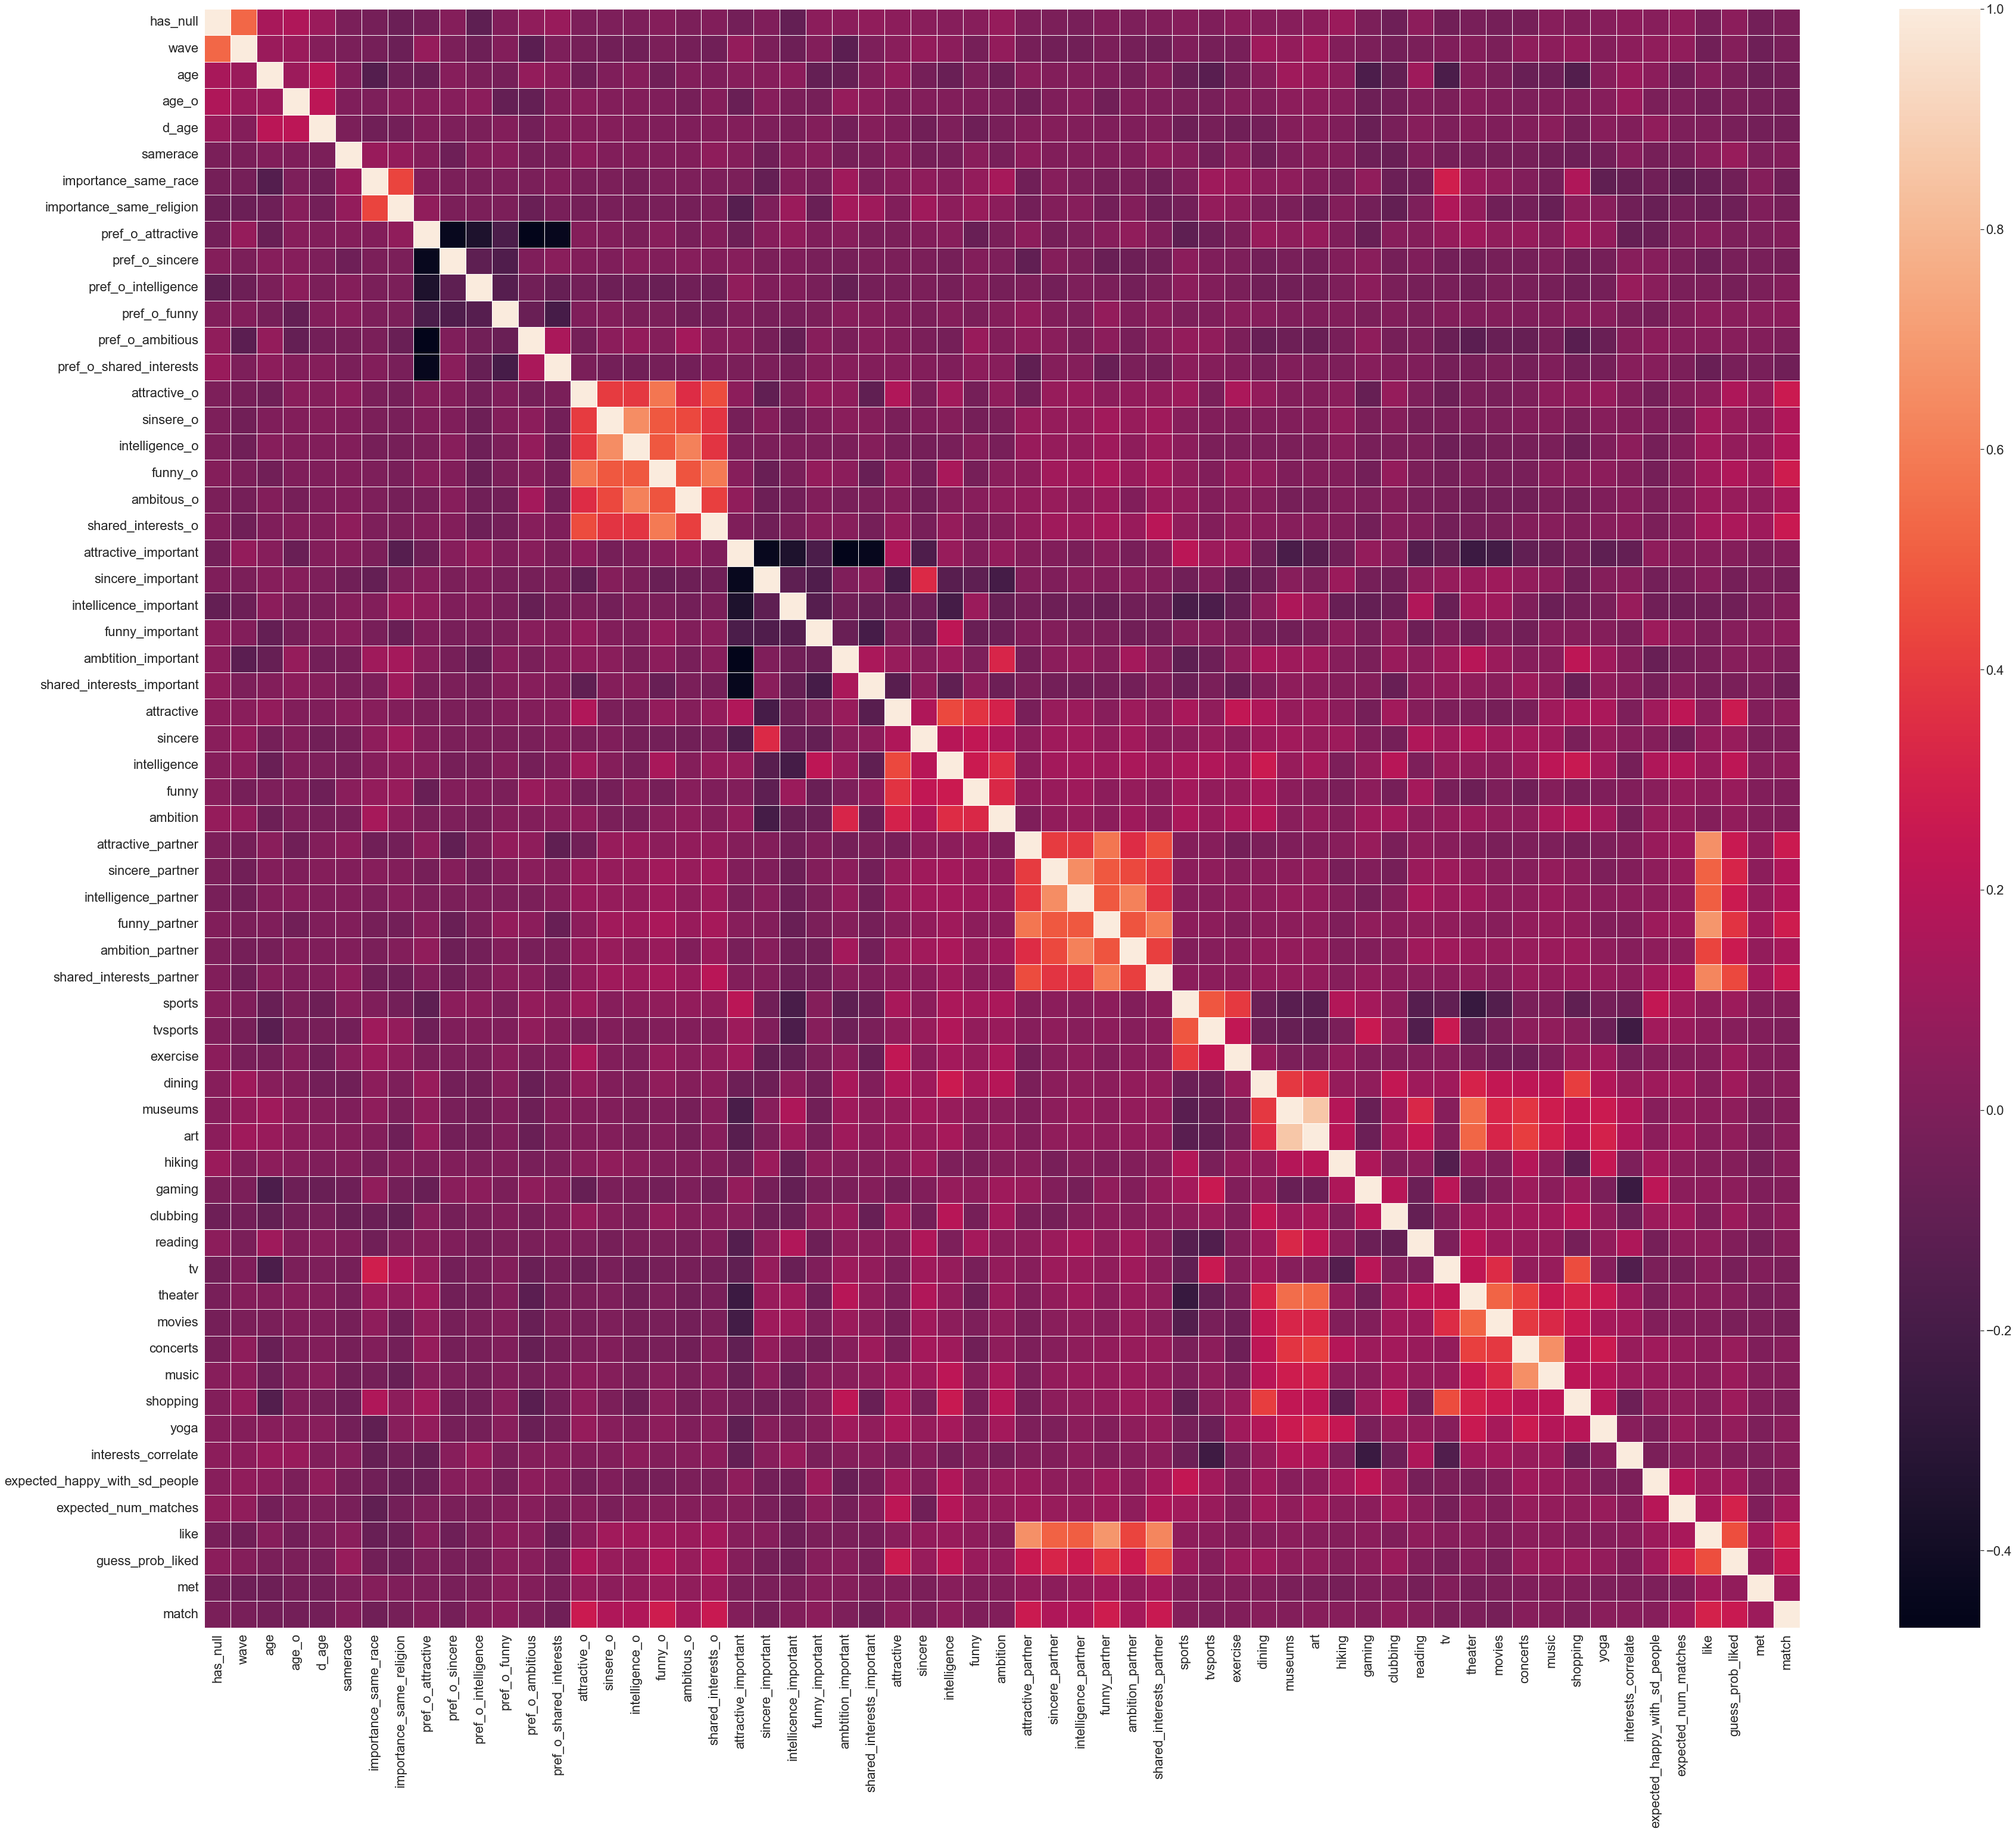

In [29]:
sns.set_style('darkgrid')
sns.set(rc = {'figure.figsize':(60,50)}, font_scale=2)
sns.heatmap(corr_matrix,linewidths=0.5)
plt.show()

Before we start training are model we need to get all the cateogrical data converted to numbers. We will then split are data into features and labels(match). We will split our training/testing set into 80/20 and try a few different classifiers on the data to see which ones perform best.

In [30]:
df = pd.get_dummies(df)

In [31]:
# Labels are the values we want to predict
labels = np.array(df['match'])
# Remove the labels from the features
# axis 1 refers to the columns
features= df.drop('match', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [32]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.20, random_state = 123)

In [33]:
scaler=StandardScaler()
scaled_train_features=scaler.fit_transform(train_features)
scaled_test_features=scaler.fit_transform(test_features)

In [34]:
rf=RandomForestClassifier(random_state=123)
svc = SVC()
gbcl = GradientBoostingClassifier(random_state=123)

In [35]:
classifiers=[('Random Forest', rf),('Support Vector', svc), ('Gradient Boosting', gbcl)]

In [36]:
for clf_name, clf in classifiers:
    clf.fit(scaled_train_features, train_labels)
    y_pred=clf.predict(scaled_test_features)
    print('{:s} : {:.3f}'.format(clf_name,accuracy_score(test_labels, y_pred)))
    print(confusion_matrix(test_labels,y_pred))

Random Forest : 0.846
[[1373   14]
 [ 244   45]]
Support Vector : 0.836
[[1371   16]
 [ 259   30]]
Gradient Boosting : 0.862
[[1336   51]
 [ 181  108]]


While Gradient Boosting has the highest accuracy score Random Forest had fewer false positives according to the confusion matrix. I am consider confusion matrix over accuracy here because of the end goal. Least amount of false positives.<br>
<br>
With that being said, I will focus on using Random Forest and performing a Grid Search to see if we can improve the accuracy and the confusion matrix.

In [37]:
params_rf={'n_estimators': [100,150,180,200],'max_depth':[None,4,8, 20, 36], 'min_samples_leaf':[0.1,0.5, 1],
            'criterion' :['gini', 'entropy']}
grid_rf=GridSearchCV(estimator=rf, param_grid=params_rf, cv=5,verbose=1, n_jobs=-1, scoring='accuracy')

In [38]:
grid_rf.fit(train_features, train_labels)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 4, 8, 20, 36],
                         'min_samples_leaf': [0.1, 0.5, 1],
                         'n_estimators': [100, 150, 180, 200]},
             scoring='accuracy', verbose=1)

In [39]:
best_hyperparams=grid_rf.best_params_
print('Best Hyperparamters:\n', best_hyperparams)

Best Hyperparamters:
 {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1, 'n_estimators': 100}


In [40]:
best_model=grid_rf.best_estimator_
y_pred=best_model.predict(test_features)
print(accuracy_score(test_labels, y_pred))
print(confusion_matrix(test_labels, y_pred))

0.8526252983293556
[[1375   12]
 [ 235   54]]


Now that we have trained and tested are model I am curious to know which features are most significant to the model. What drives humans to match with someone? I am pretty sure I have a good idea but let's see if my assumptions are true!

In [41]:
importances=list(best_model.feature_importances_)
feature_importances=[(feature, round(importance, 3)) for feature, importance in zip(feature_list, importances)]
feature_importances=sorted(feature_importances, key=lambda x: x[1], reverse=True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: funny_o              Importance: 0.041
Variable: like                 Importance: 0.041
Variable: attractive_o         Importance: 0.035
Variable: shared_interests_o   Importance: 0.035
Variable: attractive_partner   Importance: 0.035
Variable: funny_partner        Importance: 0.031
Variable: shared_interests_partner Importance: 0.029
Variable: guess_prob_liked     Importance: 0.025
Variable: interests_correlate  Importance: 0.023
Variable: pref_o_attractive    Importance: 0.019
Variable: pref_o_shared_interests Importance: 0.019
Variable: pref_o_intelligence  Importance: 0.018
Variable: intelligence_o       Importance: 0.018
Variable: expected_num_matches Importance: 0.018
Variable: age_o                Importance: 0.017
Variable: pref_o_sincere       Importance: 0.017
Variable: pref_o_funny         Importance: 0.017
Variable: pref_o_ambitious     Importance: 0.017
Variable: sinsere_o            Importance: 0.017
Variable: d_age                Importance: 0.015
Variable: amb

And there we have it! Being funny, attratctive, and having share interests seems to be most important!